# AllStateClaim Severity - predicting loss using Regression

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from collections import defaultdict
from sklearn import linear_model


## Reading the training data

In [87]:
train_data = pd.read_csv('train.csv')
print(type(train_data))
train_data.drop('id',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>


In [88]:
#taking a small portion of the training data instead of the whole data 
#train_data = train_data.head()


## Converting categorical variables to numerical values
### Create a dataframe with only cat variables to convert them to numerical using hot-code-encoder

## select columns starting with cat and form a list

In [89]:
def splitFeaturesIntoCatAndCont(features):

    cat_col_list = []
    cont_col_list = []
    for i in features:
        if i.startswith("cat"):
            cat_col_list.append(i)
        else:
            #id column will also be appended to the cont_col_list
            cont_col_list.append(i)

    
    return cat_col_list,cont_col_list


### convert list to dataframe of cat and col

In [90]:
def split_DataFrame_intoCatAndCont(data_frame, train_cat_col_list,train_cont_col_list):
    cat_col_df = pd.DataFrame(data_frame, columns = train_cat_col_list)
    cont_col_df = pd.DataFrame(data_frame, columns = train_cont_col_list)
    return cat_col_df,cont_col_df
    


## Label Encoding of all data

In [91]:
def labelEncode(categoricalData, continuousData):
    #Categorical features analysis
    from sklearn.preprocessing import LabelEncoder
    catFeatures = []
    for colName in categoricalData.columns:
        le = LabelEncoder()
        le.fit(categoricalData[colName].unique())
        categoricalData[colName] = le.transform(categoricalData[colName])

    encoded_train_data = categoricalData.join(continuousData)
    #encoded_train_data = pd.concat(categoricalData, continuousData, axis = 1, ignore_index= True)
    return encoded_train_data



### 10-fold cross validation

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import KFold


def cross_validate(total_samples, n_folds, X,Y,clf):
    accuracy = []
    kf = KFold(total_samples,n_folds, True)# shuffle=True,
                               
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy.append(mean_squared_error(y_test,predictions))
        print(accuracy)
        
    return clf,np.array(accuracy)


    

### Scaling the features (except response feature)

In [93]:
from sklearn.preprocessing import scale

def normalize(X):
    scale(X, axis=0, with_mean=True, with_std=True, copy=True)

    return X

### list of commands to execute for training data

In [94]:
features = list(train_data.columns.values)

#cat_col_list,cont_col_list

train_cat_col_list,train_cont_col_list = splitFeaturesIntoCatAndCont(features)



train_cat_col_df,train_cont_col_df = split_DataFrame_intoCatAndCont(train_data, train_cat_col_list,train_cont_col_list )

train_feature_df = labelEncode(train_cat_col_df, train_cont_col_df)



train_feature = np.array(train_feature_df)
r, c = train_feature.shape


#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X_train = train_feature[:,0:(c-1)]
y_train = train_feature[:,(c-1)]

# normalization of features
X_train = normalize(X_train)

X_all = []

X_all.append([i_cols])

print("Shape of X")
print(X_train.shape)
print(type(X_train))
print(type(train_feature_df))

Shape of X
(188318, 130)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


### Recursive Feature Elimination

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE


#Linear Regression
clf = LinearRegression(fit_intercept = True, normalize= True)


# RFE 
selector = RFE(clf, n_features_to_select = 130, step=1)
selector = selector.fit(X_train, y_train)

print(np.where(selector.support_ == True)[0])

featureNames  = train_cat_col_list+train_cont_col_list
#print(featureNames)

finalFeatures = []

for num in np.where(selector.support_ == True)[0]:
    finalFeatures.append(featureNames[num])

print(finalFeatures)
print(type(finalFeatures))


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129]
['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'c

In [168]:
X_finalFeatures_df = pd.DataFrame(train_feature_df, columns = finalFeatures)
X_finalFeatures_df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,1,0,0,0,0,1,0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0,1,0,0,0,0,0,0,1,1,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0,1,0,0,1,0,0,0,1,1,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,1,1,0,1,0,0,0,0,1,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0,1,0,1,0,0,0,0,1,1,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


### ridge ression

In [169]:
from sklearn import linear_model

reg = linear_model.Ridge (alpha = .5)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size=0.33, random_state=42)
reg.fit(X_train1,y_train1)

predictions = reg.predict(X_test1)
RR_mae = mean_absolute_error(y_test1,predictions)
print(mean_absolute_error(y_test1,predictions))

1328.59944499


### lasso

In [170]:

clf = linear_model.Lasso(alpha = 0.1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size=0.33, random_state=42)
clf.fit(X_train1,y_train1)

predictions = clf.predict(X_test1)
Lasso_mae = mean_absolute_error(y_test1,predictions)
print(mean_absolute_error(y_test1,predictions))

1328.2302849


C:\Users\varshinig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


### decision tree regressor

In [171]:

from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state=0)



X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size=0.33, random_state=42)
regressor.fit(X_train1,y_train1)

predictions = regressor.predict(X_test1)
DTR_mae = mean_absolute_error(y_test1,predictions)
print(mean_absolute_error(y_test1,predictions))

1755.37111047


### xgb regressor

In [172]:
import xgboost as xgb

clf = xgb.XGBRegressor()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size=0.33, random_state=42)
clf.fit(X_train1,y_train1)

predictions = clf.predict(X_test1)
XGB_mae = mean_absolute_error(y_test1,predictions)
print(mean_absolute_error(y_test1,predictions))

1244.54728673


### Bagging(Random Forest)

In [173]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size=0.33, random_state=42)
clf.fit(X_train1,y_train1)

predictions = clf.predict(X_test1)
Bagging_mae = mean_absolute_error(y_test1,predictions)
print(mean_absolute_error(y_test1,predictions))

1316.94940182


### Boosting(adaBoost)

In [174]:
from sklearn.ensemble import AdaBoostRegressor

clf = AdaBoostRegressor()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size=0.33, random_state=42)
clf.fit(X_train1,y_train1)

predictions = clf.predict(X_test1)
adaboost_mae = mean_absolute_error(y_test1,predictions)
print(mean_absolute_error(y_test1,predictions))

4010.96975598


### Stochastic Gradient Boosting

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_finalFeatures_df, y_train, test_size=0.33, random_state=42)
clf.fit(X_train1,y_train1)

predictions = clf.predict(X_test1)
STGB_mae = mean_absolute_error(y_test1,predictions)
print(mean_absolute_error(y_test1,predictions))

1245.14794165


### plotting models MAE

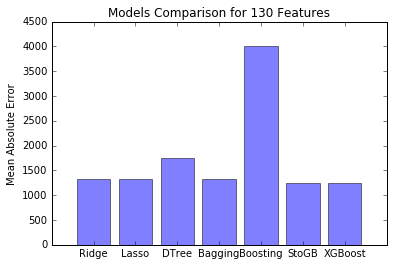

In [176]:
objects = ('Ridge', 'Lasso', 'DTree', 'Bagging', 'Boosting' ,'StoGB','XGBoost', )
y_pos = np.arange(len(objects))
performance = [RR_mae,Lasso_mae,DTR_mae,  Bagging_mae, adaboost_mae, STGB_mae, XGB_mae]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Absolute Error')
plt.title('Models Comparison for 130 Features')
 
plt.show()
